This trick was found [here](http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/) and also [here](http://www.python-simple.com/python-matplotlib/boxplot.php).

In [1]:
%matplotlib inline

In [2]:
## numpy is used for creating fake data
import numpy as np 
import matplotlib as mpl 
import pandas as pd
import os

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt 

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Boxplot comparing results from 3 approaches of segmentation parameter optimization

## Importing .csv in a dataframe

In [3]:
## Set âth to the data
approach_A_csv='A_SEGMENT_uspo_results_f1.csv'
approach_B_csv='B_SEGMENT_uspo_results_f1.csv'
approach_C_csv='C_SEGMENT_uspo_results_f1.csv'

In [4]:
## Import best segmentation parameters in a new dataframe
dfA=pd.read_csv(approach_A_csv, sep=',',header=0)
dfB=pd.read_csv(approach_B_csv, sep=',',header=0)
dfC=pd.read_csv(approach_C_csv, sep=',',header=0)

In [8]:
dfA.head()

,region,area,morpho_type,threshold,minsize,variance,spatial_autocorrelation,optimization_criteria
0,1,10.100564,5555555,0.012,15,2089.721266,0.369368,0.618255


In [9]:
dfB.head()

,region,area,morpho_type,threshold,minsize,variance,spatial_autocorrelation,optimization_criteria
0,58,1.012619,0,0.011,15,1346.734889,0.501063,0.576717
1,109,1.665881,11,0.014,15,3106.006077,0.172743,0.601229
2,137,2.244185,12,0.013,15,2830.028928,0.180007,0.597206
3,97,0.305531,13,0.012,15,2392.708498,0.270255,0.677734
4,124,0.336077,14,0.011,15,1439.378611,0.317956,0.597143


In [11]:
dfC.head()

,region,optimization_criteria,morpho_type,threshold,minsize,variance,spatial_autocorrelation
0,123,0.593271,0,0.012,15,1153.136831,0.162017
1,20,0.585389,0,0.011,15,1579.866443,0.288554
2,15,0.581548,0,0.012,15,1507.438729,0.170753
3,279,0.648834,0,0.011,15,1529.490489,0.392974
4,236,0.655809,0,0.011,15,1658.064202,0.339775


## Get data for approach C (local approach)

In [12]:
# Get a list with unique values of 'morpho_type'
listmorpho=list(dfC.morpho_type.unique())
listmorphoname=[]
for x in listmorpho:
    listmorphoname.append(str(x))

In [13]:
approach_C={}
for x in listmorpho:
    tempdf=dfC.loc[dfC['morpho_type'] == x].copy()
    tempdf.sort_values(['threshold'], inplace=True)
    approach_C['key_%s'%x]=np.around(tempdf.loc[:,['threshold']]['threshold'].tolist(),decimals=3)

In [14]:
for x in listmorpho:
    print approach_C['key_%s'%x]

[ 0.008  0.009  0.01   0.01   0.01   0.011  0.011  0.011  0.011  0.011
  0.011  0.011  0.011  0.012  0.012  0.012  0.012  0.012  0.013  0.013]
[ 0.01   0.011  0.012  0.013  0.013  0.013  0.013  0.014  0.014  0.014
  0.014  0.014  0.014  0.014  0.014  0.015  0.015  0.015  0.015  0.018]
[ 0.01   0.011  0.013  0.013  0.013  0.014  0.014  0.014  0.014  0.015
  0.015  0.016]
[ 0.012  0.012  0.012  0.012  0.012  0.013  0.013  0.013  0.013  0.013
  0.013  0.013  0.014  0.015  0.015  0.019  0.019  0.02 ]
[ 0.009  0.011  0.011  0.012  0.012  0.013  0.013  0.013  0.014  0.014
  0.015  0.015  0.015  0.02   0.022]
[ 0.013  0.014  0.014  0.015  0.015  0.015  0.015  0.015  0.016  0.016
  0.016  0.017  0.021]
[ 0.013  0.013  0.013  0.013  0.014  0.014  0.014  0.015  0.015  0.015
  0.015  0.016  0.016  0.016]
[ 0.012  0.012  0.012  0.014  0.014  0.014  0.015  0.015  0.015  0.016
  0.016  0.016  0.018  0.018  0.021  0.022  0.027]
[ 0.01   0.011  0.011  0.012  0.012  0.012  0.012  0.013  0.013  0.013
  

In [15]:
data_to_plot_C=[]
for x in listmorpho:
    data_to_plot_C.append(approach_C['key_%s'%x])

## Compute widths of boxes according to the number of samples in C

In [16]:
boxes_widths=[]
# Computing widths of boxes
for i in range(len(data_to_plot_C)):
    boxes_widths.append(np.sqrt(len(data_to_plot_C[i])))

# Standardize
maxval=float(max(boxes_widths))*1.1
minval=float(min(boxes_widths))*0.9

boxes_widths_standard=[]
for i in range(len(boxes_widths)):
    std_value=(boxes_widths[i]-minval)/(maxval-minval)
    boxes_widths_standard.append(round(std_value,3))
    
print boxes_widths_standard

[0.352, 0.352, 0.23, 0.324, 0.279, 0.247, 0.264, 0.31, 0.378, 0.021, 0.892, 0.657]


## Create the graph

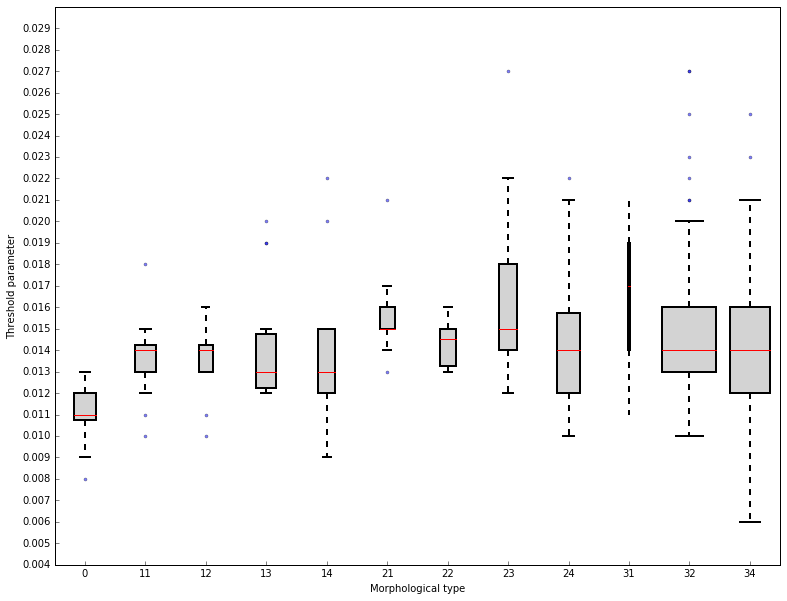

In [18]:
# Create a figure instance
fig = plt.figure(1, figsize=(13, 10))
plt.ylim(0.004, 0.030)

# Create an axes instance
ax = fig.add_subplot(111)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.001))

# Create the boxplot
boxplotElements = ax.boxplot(data_to_plot_C, patch_artist=True, whis = 1.5, widths=boxes_widths_standard)

## change outline color, fill color and linewidth of the boxes
for element in boxplotElements['boxes']:
    element.set_edgecolor('black')
    element.set_facecolor('lightgrey')
    element.set_linewidth(2)
    #element.set_linestyle('dashed')
    element.set_fill(True)
    #element.set_hatch('/')

## change color and linewidth of the whiskers
for element in boxplotElements['whiskers']:
    element.set_color('black')
    element.set_linewidth(2)

## change color and linewidth of the caps
for element in boxplotElements['caps']:
    element.set_color('black')
    element.set_linewidth(2)
    
## change color and linewidth of the medians
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

## change the style of fliers and their fill
for element in boxplotElements['fliers']:
    element.set_color('dark')
    element.set_marker('.')
    element.set_alpha(0.5)
    
## Custom x-axis labels
ax.set_xticklabels(listmorphoname)
ax.set_xlabel('Morphological type')

## Custom y-axis labels
ax.set_ylabel('Threshold parameter')

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
boxplot_output="boxplot_A.svg"
fig.savefig(boxplot_output, bbox_inches='tight', format='svg', dpi=1200)

## Get data for approach B (type approach)

In [19]:
# Get a list with unique values of 'morpho_type'
listmorpho=list(dfB.morpho_type.unique())
listmorphoname=[]
for x in listmorpho:
    listmorphoname.append(str(x))

In [20]:
approach_B=[]
for x in listmorpho:
    tempdf=dfB.loc[dfB['morpho_type'] == x].copy()
    approach_B.append(round(tempdf.loc[:,['threshold']]['threshold'],3))

In [21]:
data_to_plot_B=[]
for x in range(len(listmorpho)):
    data_to_plot_B.append(approach_B[x])

In [22]:
type(listmorpho)

list

In [23]:
type(data_to_plot_B)

list

In [24]:
listmorpho

[0, 11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 34]

In [25]:
data_to_plot_B

[0.011,
 0.014,
 0.013,
 0.012,
 0.011,
 0.015,
 0.014,
 0.014,
 0.011,
 0.012,
 0.013,
 0.011]

In [26]:
len(listmorphoname)

12

In [27]:
range(1,len(listmorphoname)+1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Create the graph

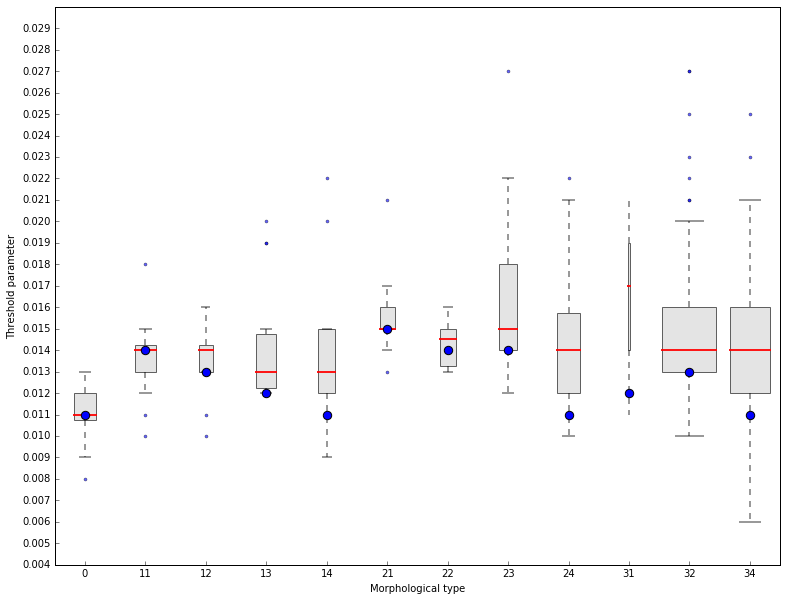

In [28]:
# Create a figure instance
fig = plt.figure(1, figsize=(13, 10))
plt.ylim(0.004, 0.030)

# Create an axes instance
ax = fig.add_subplot(111)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.001))

# Create the boxplot for approach C
boxplotElements = ax.boxplot(data_to_plot_C, patch_artist=True, 
                             whis = 1.5, widths=boxes_widths_standard)

## change outline color, fill color and linewidth of the boxes
for element in boxplotElements['boxes']:
    element.set_edgecolor('black')
    element.set_facecolor('lightgrey')
    element.set_linewidth(1)
    #element.set_linestyle('dashed')
    element.set_fill(True)
    element.set_alpha(0.6)
    #element.set_hatch('/')

## change color and linewidth of the whiskers
for element in boxplotElements['whiskers']:
    element.set_color('black')
    element.set_linewidth(2)
    element.set_alpha(0.4)

## change color and linewidth of the caps
for element in boxplotElements['caps']:
    element.set_color('black')
    element.set_linewidth(2)
    element.set_alpha(0.4)
    
## change color and linewidth of the medians
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(2)
    element.set_alpha(0.9)

## change the style of fliers and their fill
for element in boxplotElements['fliers']:
    element.set_color('dark')
    element.set_marker('.')
    element.set_alpha(0.6)
    
    
# Create the scatter plot for approach B
ScatterElements = ax.scatter(range(1,len(listmorphoname)+1), data_to_plot_B,
                            s=70, c='b', alpha=1, zorder=10)
    
## Custom x-axis labels
ax.set_xticklabels(listmorphoname)
ax.set_xlabel('Morphological type')

## Custom y-axis labels
ax.set_ylabel('Threshold parameter')

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
boxplot_output="boxplot_B.svg"
fig.savefig(boxplot_output, bbox_inches='tight', format='svg', dpi=1200)

## Get data for approach A (type approach)

In [29]:
data_to_plot_A=[]
for x in list(dfA.morpho_type.unique()):
    tempdf=dfA.loc[dfA['morpho_type'] == x].copy()
    data_to_plot_A.append(round(tempdf.loc[:,['threshold']]['threshold'],3))

In [30]:
data_to_plot_A

[0.012]

## Create the graph

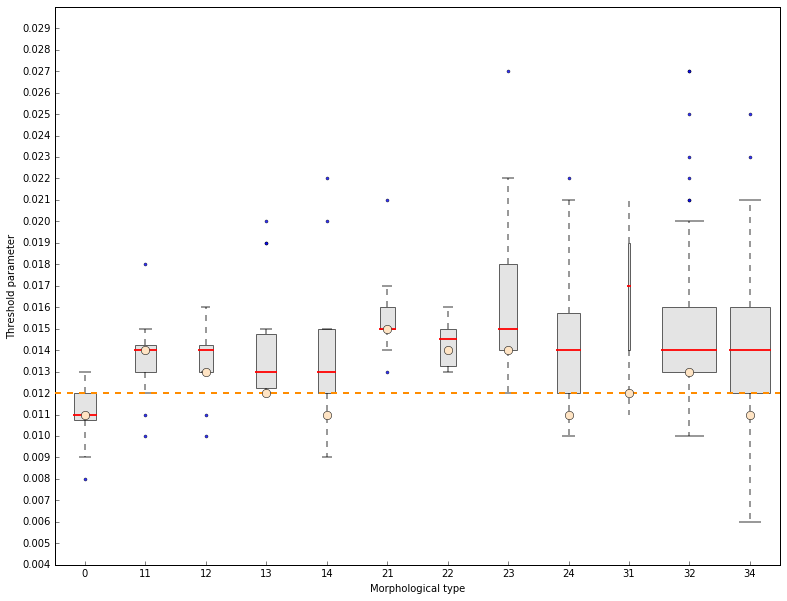

In [31]:
# Create a figure instance
fig = plt.figure(1, figsize=(13, 10))
plt.ylim(0.004, 0.030)

# Create an axes instance
ax = fig.add_subplot(111)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.001))

# Create the boxplot for approach C
boxplotElements = ax.boxplot(data_to_plot_C, patch_artist=True, 
                             whis = 1.5, widths=boxes_widths_standard)

## change outline color, fill color and linewidth of the boxes
for element in boxplotElements['boxes']:
    element.set_edgecolor('black')
    element.set_facecolor('lightgrey')
    element.set_linewidth(1)
    #element.set_linestyle('dashed')
    element.set_fill(True)
    element.set_alpha(0.6)
    #element.set_hatch('/')

## change color and linewidth of the whiskers
for element in boxplotElements['whiskers']:
    element.set_color('black')
    element.set_linewidth(2)
    element.set_alpha(0.4)

## change color and linewidth of the caps
for element in boxplotElements['caps']:
    element.set_color('black')
    element.set_linewidth(2)
    element.set_alpha(0.4)
    
## change color and linewidth of the medians
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(2)
    element.set_alpha(0.9)

## change the style of fliers and their fill
for element in boxplotElements['fliers']:
    element.set_color('dark')
    element.set_marker('.')
    element.set_alpha(0.8)
    
# Create the line for approach A
LineElements = ax.axhline(y=data_to_plot_A, color='darkorange', 
                          linewidth=2, linestyle='dashed', alpha=1, zorder=10)

# Create the scatter plot for approach B
ScatterElements = ax.scatter(range(1,len(listmorphoname)+1), data_to_plot_B,
                            s=70, c='bisque', alpha=1, linewidths=0.5, zorder=15)
    
## Custom x-axis labels
ax.set_xticklabels(listmorphoname)
ax.set_xlabel('Morphological type')

## Custom y-axis labels
ax.set_ylabel('Threshold parameter')

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
boxplot_output="boxplot_C.svg"
fig.savefig(boxplot_output, bbox_inches='tight', format='svg', dpi=1200)